# 形态学转换

### 目标

在这一章当中， 我们将学习不同的形态学操作，例如侵蚀，膨胀，开运算，闭运算等。 我们将看到不同的功能，例如：**cv.erode**(),**cv.dilate**(), **cv.morphologyEx**()等。

### 理论

形态变换是一些基于图像形状的简单操作。通常在二进制图像上执行。它需要两个输入，一个是我们的原始图像，第二个是决定**操作性质的结构元素**或**内核**。两种基本的形态学算子是侵蚀和膨胀。然后，它的变体形式（如“打开”，“关闭”，“渐变”等）也开始起作用。在下图的帮助下，我们将一一看到它们：

![](data/j.png)

#### 1. 侵蚀

侵蚀的基本思想就像土壤侵蚀一样，它侵蚀前景物体的边界(尽量使前景保持白色)。它是做什么的呢?内核滑动通过图像(在2D卷积中)。原始图像中的一个像素(无论是1还是0)只有当内核下的所有像素都是1时才被认为是1，否则它就会被侵蚀(变成0)。

结果是，根据内核的大小，边界附近的所有像素都会被丢弃。因此，前景物体的厚度或大小减小，或只是图像中的白色区域减小。它有助于去除小的白色噪声(正如我们在颜色空间章节中看到的)，分离两个连接的对象等。

在这里，作为一个例子，我将使用一个5x5内核，它包含了所有的1。让我们看看它是如何工作的:

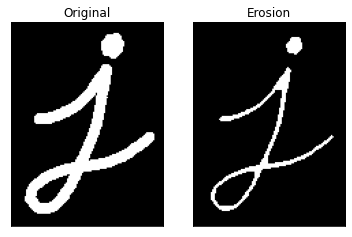

In [1]:
import cv2 as cv
import numpy as np
import random
from matplotlib import pyplot as plt

img = cv.imread('data/j.png', cv.IMREAD_GRAYSCALE)

assert img is not None, "file could not be read, check with os.path.exists()"

kernel = np.ones((5, 5), np.uint8)

erosion = cv.erode(img, kernel, iterations=1)

plt.subplot(121),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cv.cvtColor(erosion, cv.COLOR_BGR2RGB)),plt.title('Erosion')
plt.xticks([]), plt.yticks([])

plt.show()

#### 2. 扩张

它与侵蚀正好相反。如果内核下的至少一个像素为“ 1”，则像素元素为“ 1”。因此，它会增加图像中的白色区域或增加前景对象的大小。通常，在消除噪音的情况下，腐蚀后会膨胀。因为腐蚀会消除白噪声，但也会缩小物体。因此，我们对其进行了扩展。由于噪音消失了，它们不会回来，但是我们的目标区域增加了。在连接对象的损坏部分时也很有用。

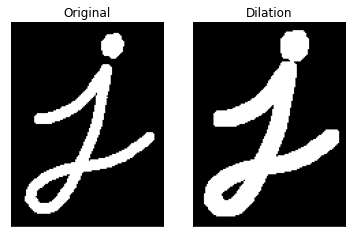

In [2]:
dilation = cv.dilate(img, kernel, iterations=1)

plt.subplot(121),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cv.cvtColor(dilation, cv.COLOR_BGR2RGB)),plt.title('Dilation')
plt.xticks([]), plt.yticks([])

plt.show()

#### 3. 开运算

开放只是**侵蚀然后扩张**的另一个名称。如上文所述，它对于消除噪音很有用。在这里，我们使用函数**cv.morphologyEx**()

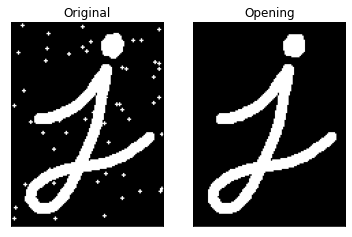

In [3]:
h, w = img.shape[:2]
noise_out = img.copy()

for i in range(60):
    x = int(random.random() * w)
    y = int(random.random() * h)
    cv.circle(noise_out, (x, y), 1, 255, -1)

opening = cv.morphologyEx(noise_out, cv.MORPH_OPEN, kernel)

plt.subplot(121),plt.imshow(cv.cvtColor(noise_out, cv.COLOR_BGR2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cv.cvtColor(opening, cv.COLOR_BGR2RGB)),plt.title('Opening')
plt.xticks([]), plt.yticks([])

plt.show()

#### 4. 闭运算

闭运算与开运算相反，**先扩张然后再侵蚀**。在关闭前景对象内部的小孔或对象上的小黑点时很有用。

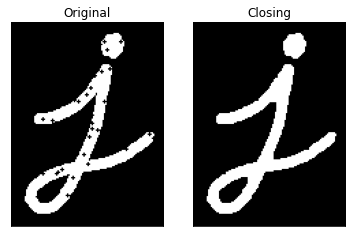

In [4]:
noise_in = img.copy()

for i in range(200):
    x = int(random.random() * w)
    y = int(random.random() * h)
    cv.circle(noise_in, (x, y), 1, 0, -1)

closing = cv.morphologyEx(noise_in, cv.MORPH_CLOSE, kernel)

plt.subplot(121),plt.imshow(cv.cvtColor(noise_in, cv.COLOR_BGR2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cv.cvtColor(closing, cv.COLOR_BGR2RGB)),plt.title('Closing')
plt.xticks([]), plt.yticks([])

plt.show()

#### 5. 形态学梯度

这是图像扩张和侵蚀之间的区别。

结果将看起来像对象的轮廓。

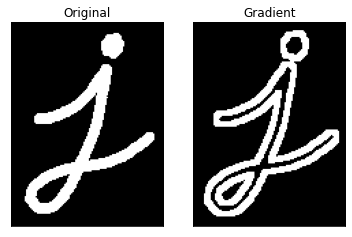

In [5]:
gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel)

plt.subplot(121),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cv.cvtColor(gradient, cv.COLOR_BGR2RGB)),plt.title('Gradient')
plt.xticks([]), plt.yticks([])

plt.show()

#### 6. 顶帽

它是输入图像和图像开运算之差。下面的示例针对9x9内核完成。

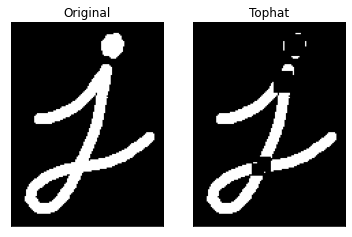

In [6]:
kernel9 = cv.getStructuringElement(cv.MORPH_RECT, (9, 9))

tophat = cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel9)

plt.subplot(121),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cv.cvtColor(tophat, cv.COLOR_BGR2RGB)),plt.title('Tophat')
plt.xticks([]), plt.yticks([])

plt.show()

#### 7. 黑帽

这是输入图像和图像闭运算之差。

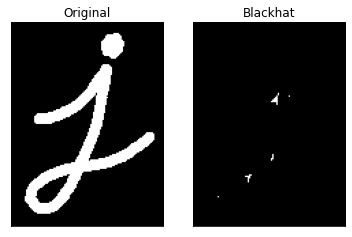

In [7]:
blackhat = cv.morphologyEx(img, cv.MORPH_BLACKHAT, kernel)

plt.subplot(121),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cv.cvtColor(blackhat, cv.COLOR_BGR2RGB)),plt.title('Blackhat')
plt.xticks([]), plt.yticks([])

plt.show()

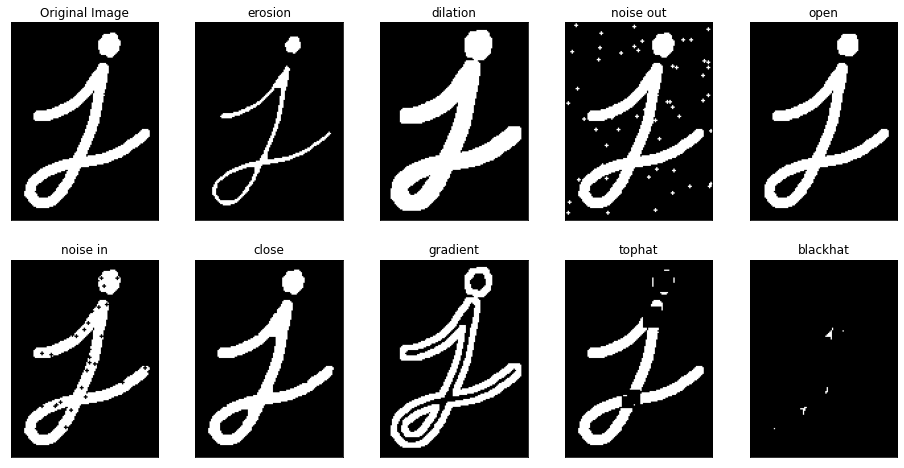

In [8]:
titles = [
    'Original Image', 'erosion', 'dilation', 'noise out', 'open',
    'noise in', 'close', 'gradient', 'tophat', 'blackhat'
]
images = [
    img, erosion, dilation, noise_out, opening, noise_in, closing, gradient, tophat, blackhat
]

plt.figure(figsize=(16, 8))

for i in range(10):
    plt.subplot(2, 5, i + 1), plt.imshow(images[i],
                                         'gray',
                                         vmin=0,
                                         vmax=255)
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

### 结构元素

在Numpy的帮助下，我们在前面的示例中手动创建了一个结构元素。它是矩形。但是在某些情况下，您可能需要椭圆形/圆形的内核。因此，为此，OpenCV具有一个函数**cv.getStructuringElement**()。您只需传递内核的形状和大小，即可获得所需的内核。

```python
# 矩形内核
>>> cv.getStructuringElement(cv.MORPH_RECT,(5,5))
array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)
# 椭圆内核
>>> cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))
array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)
# 十字内核
>>> cv.getStructuringElement(cv.MORPH_CROSS,(5,5))
array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)
```

In [9]:
print('Kernel Rect\n', cv.getStructuringElement(cv.MORPH_RECT, (5, 5)))
print('Kernel Ellipse\n', cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5)))
print('Kernel Cross\n', cv.getStructuringElement(cv.MORPH_CROSS, (5, 5)))

Kernel Rect
 [[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
Kernel Ellipse
 [[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]
Kernel Cross
 [[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]


### 其他资源

1. Morphological Operations：http://homepages.inf.ed.ac.uk/rbf/HIPR2/morops.htm at HIPR2

### 练习